##Neural Network Classification - Multiclass

In [ ]:
#Mount the google drive connection to our dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tensorflow Notes/datasets/customer_segmentation_train.csv')

In [ ]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df.drop("ID", axis=1, inplace=True)

In [ ]:
df.drop("Var_1", axis=1, inplace=True)

In [ ]:
df["Spending_Score"].unique()

array(['Low', 'Average', 'High'], dtype=object)

In [ ]:
df["Segmentation"].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           8068 non-null   object 
 1   Ever_Married     7928 non-null   object 
 2   Age              8068 non-null   int64  
 3   Graduated        7990 non-null   object 
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 567.4+ KB


In [ ]:
df.describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [ ]:
df.isna().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

In [ ]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Segmentation         0
dtype: int64

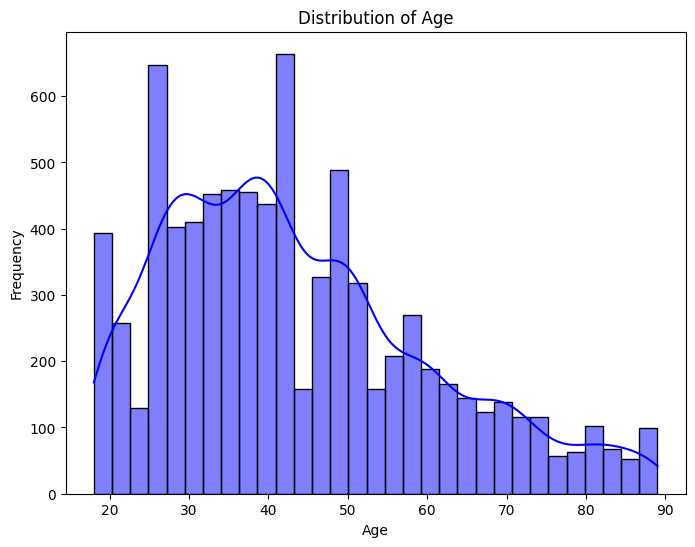

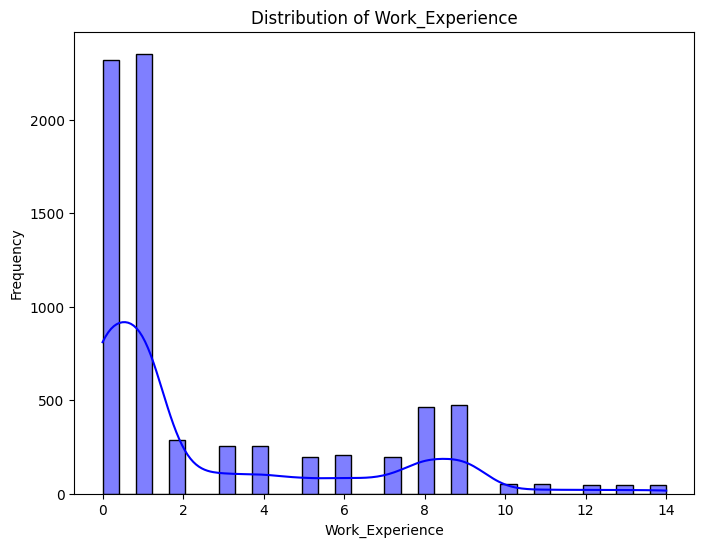

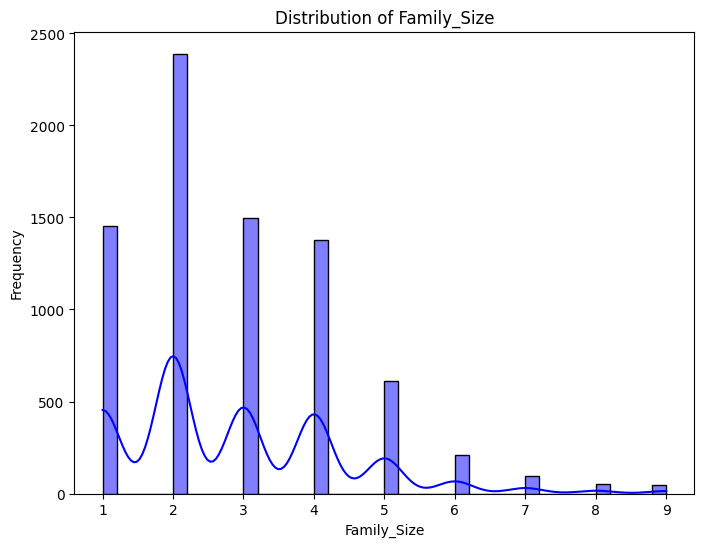

<ipython-input-164-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


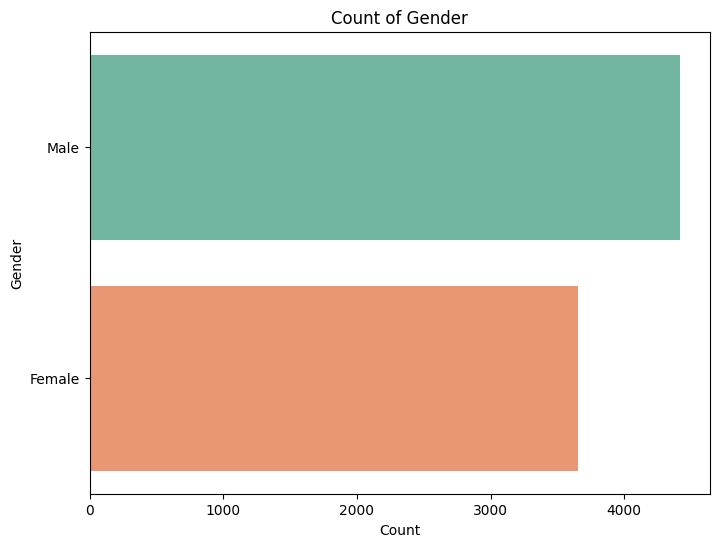

<ipython-input-164-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


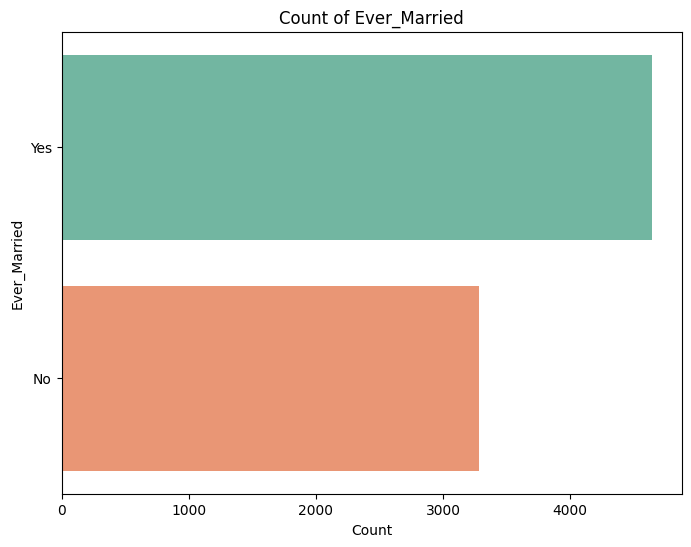

<ipython-input-164-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


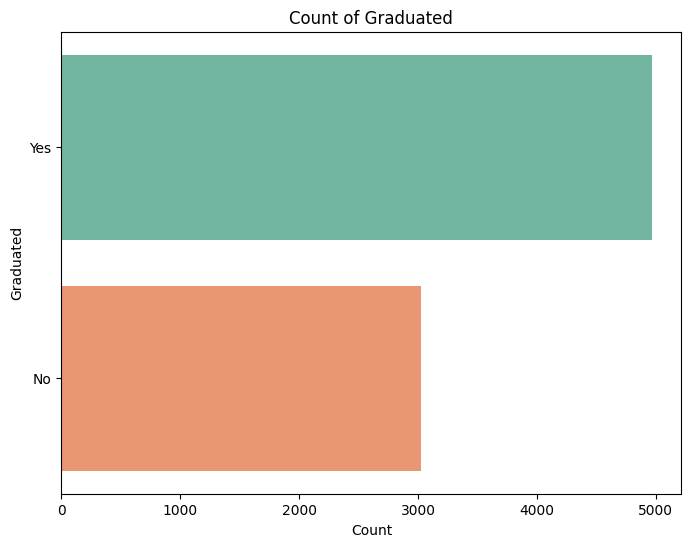

<ipython-input-164-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


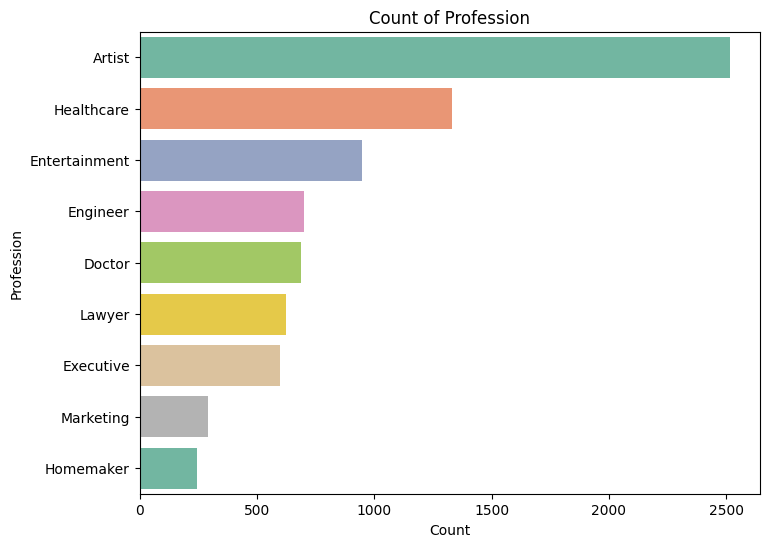

<ipython-input-164-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


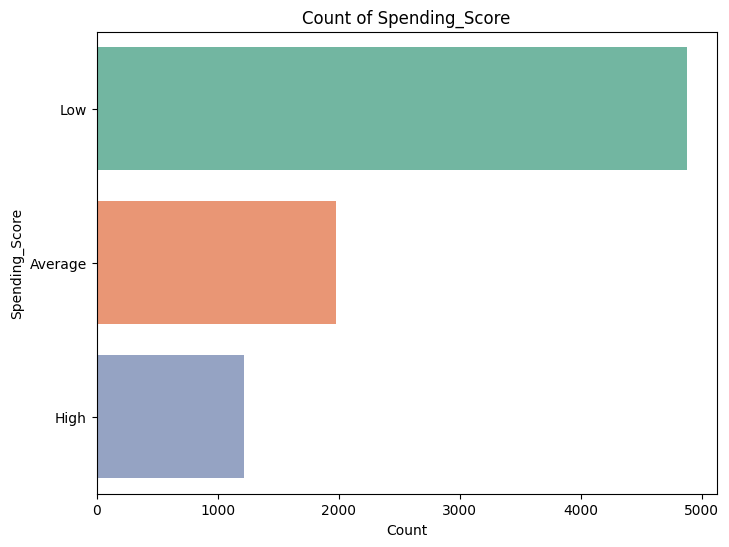

<ipython-input-164-eae17d6a7f85>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')


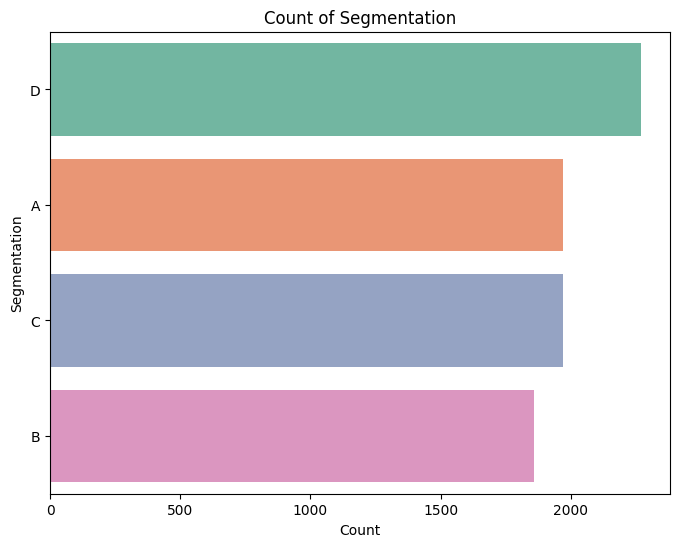

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_charts(df):
  # Numeric features
  numeric_features = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
  for feature in numeric_features:
      plt.figure(figsize=(8, 6))
      sns.histplot(df[feature], kde=True, color='blue')
      plt.title(f'Distribution of {feature}')
      plt.xlabel(feature)
      plt.ylabel('Frequency')
      plt.show()

  # Categorical features
  categorical_features = [col for col in df.columns if df[col].dtype == 'object']
  for feature in categorical_features:
      plt.figure(figsize=(8, 6))
      sns.countplot(y=df[feature], order=df[feature].value_counts().index, palette='Set2')
      plt.title(f'Count of {feature}')
      plt.xlabel('Count')
      plt.ylabel(feature)
      plt.show()

plot_charts(df)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

# Define the columns
one_hot_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession']
ordinal_cols = ['Spending_Score', 'Segmentation']
normalized_cols = [col for col in df.columns if col not in one_hot_cols and col not in ordinal_cols and col != 'Segmentation']

# Pipeline for one_hot_cols
one_hot_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Pipeline for ordinal_cols
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=[['Low', 'Average', 'High'], ['A', 'B', 'C', 'D']]))
])

# Pipeline for normalized_cols
normalized_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer

# Combine all pipelines into a single preprocessor
preprocessor = ColumnTransformer([
    ('one_hot', one_hot_pipeline, one_hot_cols),
    ('ordinal', ordinal_pipeline, ordinal_cols),
    ('normalized', normalized_pipeline, normalized_cols)
])

# Now you can fit_transform your data
df_processed = preprocessor.fit_transform(df)

In [ ]:
df_processed.shape

(8068, 20)

In [ ]:
df_processed

array([[0.        , 1.        , 1.        , ..., 0.05633803, 0.07142857,
        0.375     ],
       [1.        , 0.        , 0.        , ..., 0.28169014, 0.18869023,
        0.25      ],
       [1.        , 0.        , 0.        , ..., 0.69014085, 0.07142857,
        0.        ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.21126761, 0.07142857,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.12676056, 0.07142857,
        0.375     ],
       [0.        , 1.        , 0.        , ..., 0.26760563, 0.        ,
        0.25      ]])

In [ ]:
import pandas as pd

# Get unique categories for one-hot encoding
one_hot_categories = [df[col].unique() for col in one_hot_cols]

# Create one-hot feature names
one_hot_feature_names = []
for col, cats in zip(one_hot_cols, one_hot_categories):
    one_hot_feature_names.extend([f"{col}_{cat}" for cat in cats if not pd.isnull(cat)])
ordinal_feature_names = ordinal_cols
normalized_feature_names = normalized_cols

# Combine all feature names
feature_names = one_hot_feature_names + ordinal_feature_names + normalized_feature_names

# Create DataFrame with processed data and appropriate column names
df_processed = pd.DataFrame(df_processed, columns=feature_names)

# Print the first few rows to verify
print(df_processed.head())

   Gender_Male  Gender_Female  Ever_Married_No  Ever_Married_Yes  \
0          0.0            1.0              1.0               0.0   
1          1.0            0.0              0.0               1.0   
2          1.0            0.0              0.0               1.0   
3          0.0            1.0              0.0               1.0   
4          1.0            0.0              0.0               1.0   

   Graduated_No  Graduated_Yes  Profession_Healthcare  Profession_Engineer  \
0           1.0            0.0                    0.0                  0.0   
1           0.0            1.0                    0.0                  0.0   
2           0.0            1.0                    0.0                  0.0   
3           0.0            1.0                    0.0                  0.0   
4           0.0            1.0                    0.0                  0.0   

   Profession_Lawyer  Profession_Entertainment  Profession_Artist  \
0                0.0                       0.0       

In [ ]:
df_processed.isnull().sum()

Gender_Male                 0
Gender_Female               0
Ever_Married_No             0
Ever_Married_Yes            0
Graduated_No                0
Graduated_Yes               0
Profession_Healthcare       0
Profession_Engineer         0
Profession_Lawyer           0
Profession_Entertainment    0
Profession_Artist           0
Profession_Executive        0
Profession_Doctor           0
Profession_Homemaker        0
Profession_Marketing        0
Spending_Score              0
Segmentation                0
Age                         0
Work_Experience             0
Family_Size                 0
dtype: int64

In [ ]:
df_processed.isna().sum()

Gender_Male                 0
Gender_Female               0
Ever_Married_No             0
Ever_Married_Yes            0
Graduated_No                0
Graduated_Yes               0
Profession_Healthcare       0
Profession_Engineer         0
Profession_Lawyer           0
Profession_Entertainment    0
Profession_Artist           0
Profession_Executive        0
Profession_Doctor           0
Profession_Homemaker        0
Profession_Marketing        0
Spending_Score              0
Segmentation                0
Age                         0
Work_Experience             0
Family_Size                 0
dtype: int64

In [ ]:
X = df_processed.drop("Segmentation", axis=1)
y = df_processed["Segmentation"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train

,Gender_Male,Gender_Female,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Healthcare,Profession_Engineer,Profession_Lawyer,Profession_Entertainment,Profession_Artist,Profession_Executive,Profession_Doctor,Profession_Homemaker,Profession_Marketing,Spending_Score,Age,Work_Experience,Family_Size
6804,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.676056,0.000000,0.125
2588,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.070423,0.071429,0.375
1788,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.535211,0.071429,0.000
7782,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.070423,0.071429,0.250
4017,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.126761,0.428571,0.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.154930,0.000000,0.125
5390,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.183099,0.071429,0.375
860,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.309859,0.285714,0.000
7603,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154930,0.000000,0.500


In [ ]:
y_train

6804    1.0
2588    1.0
1788    1.0
7782    3.0
4017    3.0
       ... 
5226    3.0
5390    1.0
860     1.0
7603    0.0
7270    2.0
Name: Segmentation, Length: 4840, dtype: float64

In [ ]:
X_train.shape

(4840, 19)

There are linear and non-linear activations:

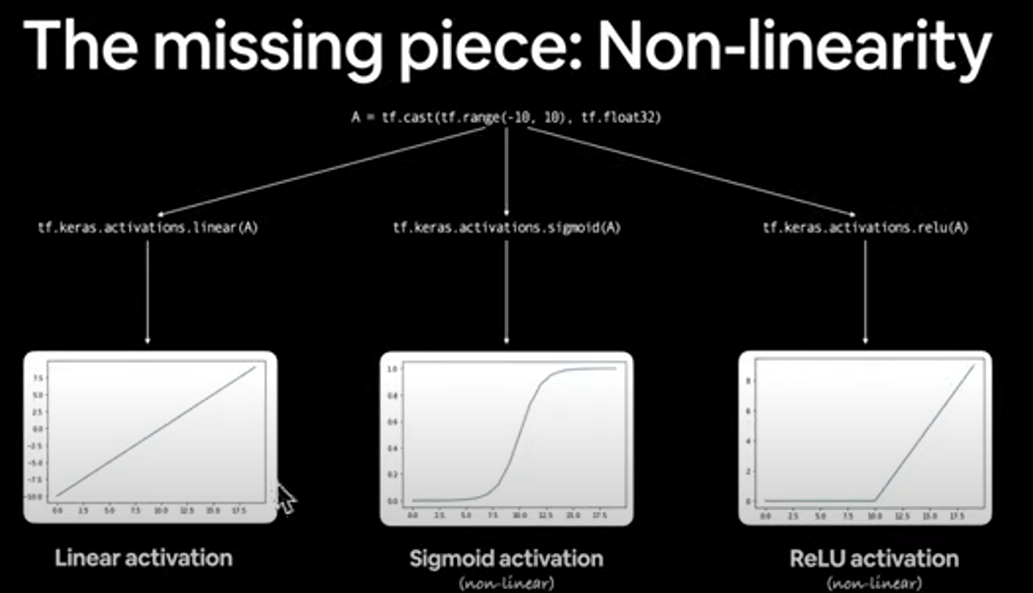

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model = tf.keras.Sequential(name="Model_1")
model.add(tf.keras.Input(shape=(19,)))  # The input layer
model.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(1, activation="softmax"))  # The output layer

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


152/152 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 2/200
152/152 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 3/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 4/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 5/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 6/200
152/152 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 7/200
152/152 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 8/200
152/152 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 9/200
152/152 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 10/200
152/152 [==============================] - 0s 2ms/step

In [ ]:
model.evaluate(X_val, y_val)

26/51 [==============>...............] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.2404

/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


51/51 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2373


[0.0, 0.2372986376285553]

In [ ]:
model.evaluate(X_train, y_train)

152/152 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2333


[0.0, 0.23326446115970612]

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model2 = tf.keras.Sequential(name="Model_1")
model2.add(tf.keras.Input(shape=(19,)))  # The input layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(200, activation='relu'))  # The hidden layer
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # The output layer

# Compile the model
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model2.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


152/152 [==============================] - 2s 5ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 2/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 3/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 4/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 5/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 6/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 7/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 8/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 9/200
152/152 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.2333
Epoch 10/200
152/152 [==============================] - 0s 3ms/step

In [ ]:
# Create the model with Sequential API using .add method
model3 = tf.keras.Sequential(name="Model_3")
model3.add(tf.keras.Input(shape=(19,)))  # The input layer
model3.add(tf.keras.layers.Dense(128, activation='relu'))  # The hidden layer with 128 neurons
model3.add(tf.keras.layers.Dropout(0.2))  # Adding dropout regularization
model3.add(tf.keras.layers.Dense(64, activation='relu'))  # Another hidden layer with 64 neurons
model3.add(tf.keras.layers.Dropout(0.2))  # Adding dropout regularization
model3.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # The output layer

# Compile the model
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Adjusted learning rate
              metrics=["accuracy"])

# Assuming X_train and y_train are your training data and labels
# Fit the model
model3.fit(X_train, y_train, epochs=100, validation_split=0.2)  # Reduced epochs and added validation split

Epoch 1/100
121/121 [==============================] - 2s 6ms/step - loss: -18.6948 - accuracy: 0.2332 - val_loss: -81.8613 - val_accuracy: 0.2355
Epoch 2/100
121/121 [==============================] - 0s 4ms/step - loss: -432.7413 - accuracy: 0.2327 - val_loss: -997.8490 - val_accuracy: 0.2355
Epoch 3/100
121/121 [==============================] - 0s 4ms/step - loss: -2242.3794 - accuracy: 0.2327 - val_loss: -3780.0732 - val_accuracy: 0.2355
Epoch 4/100
121/121 [==============================] - 0s 4ms/step - loss: -6442.2041 - accuracy: 0.2327 - val_loss: -9352.4385 - val_accuracy: 0.2355
Epoch 5/100
121/121 [==============================] - 1s 4ms/step - loss: -14036.3584 - accuracy: 0.2327 - val_loss: -18552.6426 - val_accuracy: 0.2355
Epoch 6/100
121/121 [==============================] - 0s 4ms/step - loss: -25821.5156 - accuracy: 0.2327 - val_loss: -32203.9297 - val_accuracy: 0.2355
Epoch 7/100
121/121 [==============================] - 0s 4ms/step - loss: -42602.2109 - accurac

In [ ]:
# Create the model with Sequential API using .add method
model4 = tf.keras.Sequential(name="Model_4")
model4.add(tf.keras.Input(shape=(19,)))  # The input layer
model4.add(tf.keras.layers.Dense(64, activation='relu'))  # The hidden layer with 64 neurons
model4.add(tf.keras.layers.Dropout(0.3))  # Adding dropout regularization with a higher rate
model4.add(tf.keras.layers.Dense(32, activation='relu'))  # Another hidden layer with 32 neurons
model4.add(tf.keras.layers.Dropout(0.3))  # Adding dropout regularization with a higher rate
model4.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # The output layer

# Compile the model
model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate further
              metrics=["accuracy"])

# Assuming X_train and y_train are your training data and labels
# Fit the model
history = model4.fit(X_train, y_train, epochs=50, validation_split=0.2)  # Reduced epochs further and kept the validation split

Epoch 1/50
121/121 [==============================] - 2s 6ms/step - loss: 0.4846 - accuracy: 0.2474 - val_loss: 0.1814 - val_accuracy: 0.2355
Epoch 2/50
121/121 [==============================] - 0s 3ms/step - loss: -0.0903 - accuracy: 0.2358 - val_loss: -0.4265 - val_accuracy: 0.2355
Epoch 3/50
121/121 [==============================] - 0s 4ms/step - loss: -0.7057 - accuracy: 0.2327 - val_loss: -1.0848 - val_accuracy: 0.2355
Epoch 4/50
121/121 [==============================] - 0s 4ms/step - loss: -1.4988 - accuracy: 0.2327 - val_loss: -1.9297 - val_accuracy: 0.2355
Epoch 5/50
121/121 [==============================] - 0s 4ms/step - loss: -2.4818 - accuracy: 0.2327 - val_loss: -3.0705 - val_accuracy: 0.2355
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: -3.8370 - accuracy: 0.2327 - val_loss: -4.6730 - val_accuracy: 0.2355
Epoch 7/50
121/121 [==============================] - 0s 3ms/step - loss: -5.8600 - accuracy: 0.2327 - val_loss: -6.9645 - val_accuracy: 0

In [ ]:
# Create the model with Sequential API using .add method
model5 = tf.keras.Sequential(name="Model_5")
model5.add(tf.keras.Input(shape=(19,)))  # The input layer
model5.add(tf.keras.layers.Dense(32, activation='relu'))  # The hidden layer with 32 neurons
model5.add(tf.keras.layers.BatchNormalization())  # Adding batch normalization
model5.add(tf.keras.layers.Dropout(0.5))  # Adding dropout regularization
model5.add(tf.keras.layers.Dense(1, activation="sigmoid"))  # The output layer

# Compile the model
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjusted learning rate further
              metrics=["accuracy"])

# Assuming X_train and y_train are your training data and labels
# Fit the model
history = model5.fit(X_train, y_train, epochs=50, validation_split=0.2)  # Reduced epochs further and kept the validation split

Epoch 1/50
121/121 [==============================] - 1s 4ms/step - loss: 0.5853 - accuracy: 0.2296 - val_loss: 0.4433 - val_accuracy: 0.2397
Epoch 2/50
121/121 [==============================] - 0s 3ms/step - loss: 0.4100 - accuracy: 0.2311 - val_loss: 0.3607 - val_accuracy: 0.2366
Epoch 3/50
121/121 [==============================] - 0s 2ms/step - loss: 0.2839 - accuracy: 0.2265 - val_loss: 0.2474 - val_accuracy: 0.2314
Epoch 4/50
121/121 [==============================] - 0s 2ms/step - loss: 0.0846 - accuracy: 0.2345 - val_loss: 0.1457 - val_accuracy: 0.2252
Epoch 5/50
121/121 [==============================] - 0s 3ms/step - loss: 0.0470 - accuracy: 0.2332 - val_loss: 0.0179 - val_accuracy: 0.2231
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: -0.1624 - accuracy: 0.2218 - val_loss: -0.0918 - val_accuracy: 0.2180
Epoch 7/50
121/121 [==============================] - 0s 2ms/step - loss: -0.2939 - accuracy: 0.2322 - val_loss: -0.2205 - val_accuracy: 0.2169
Ep

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model6 = tf.keras.Sequential(name="Model_1")
model6.add(tf.keras.Input(shape=(19,)))  # The input layer
model6.add(tf.keras.layers.Dense(100, activation='relu'))  # The hidden layer with 32 neurons
model6.add(tf.keras.layers.BatchNormalization())  # Adding batch normalization
model6.add(tf.keras.layers.Dense(1, activation="linear"))

# Compile the model
model6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),  # Adjusted learning rate further
              metrics=["accuracy"])

# Assuming X_train and y_train are your training data and labels
# Fit the model
history = model6.fit(X_train, y_train, epochs=50, validation_split=0.2)  # Reduced epochs further and kept the validation split

Epoch 1/50
121/121 [==============================] - 2s 7ms/step - loss: 5.9231 - accuracy: 0.2376 - val_loss: 10.2839 - val_accuracy: 0.2397
Epoch 2/50
121/121 [==============================] - 0s 3ms/step - loss: 3.0996 - accuracy: 0.2415 - val_loss: 2.9532 - val_accuracy: 0.2562
Epoch 3/50
121/121 [==============================] - 0s 4ms/step - loss: 0.8026 - accuracy: 0.2567 - val_loss: 0.2502 - val_accuracy: 0.2500
Epoch 4/50
121/121 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.2552 - val_loss: 0.1080 - val_accuracy: 0.2521
Epoch 5/50
121/121 [==============================] - 0s 4ms/step - loss: -0.3973 - accuracy: 0.2539 - val_loss: 0.2852 - val_accuracy: 0.2479
Epoch 6/50
121/121 [==============================] - 1s 4ms/step - loss: -0.4586 - accuracy: 0.2490 - val_loss: -0.1875 - val_accuracy: 0.2541
Epoch 7/50
121/121 [==============================] - 1s 4ms/step - loss: -0.5171 - accuracy: 0.2539 - val_loss: -0.1288 - val_accuracy: 0.2479


#Let's use PCA:

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Apply PCA to the processed DataFrame
pca = PCA(n_components=0.95)  # Choose the number of components to explain 95% of the variance
X_pca = pca.fit_transform(X)

# Create a DataFrame with the transformed data
X_pca = pd.DataFrame(X_pca)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the number of components selected
print("Number of Components:", pca.n_components_)

# Print the shape of the transformed DataFrame
print("Shape of Transformed DataFrame:", X_pca.shape)

Explained Variance Ratio: [0.31364948 0.18092616 0.15626162 0.07460748 0.06435574 0.0402729
 0.03407413 0.03047453 0.0274701  0.02131034 0.01826628]
Number of Components: 11
Shape of Transformed DataFrame: (8068, 11)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X_pca, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train.shape

(4840, 11)

In [ ]:
import tensorflow as tf

# Create the model with Sequential API using .add method
model = tf.keras.Sequential(name="Model_1")
model.add(tf.keras.Input(shape=(11,)))  # The input layer
model.add(tf.keras.layers.Dense(100, activation='relu'))  # The hidden layer
model.add(tf.keras.layers.Dense(1, activation="linear"))  # The output layer

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Assuming X_tensor and y_tensor are your input and target tensors
# Fit the model
model.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


152/152 [==============================] - 2s 4ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 2/200
152/152 [==============================] - 1s 4ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 3/200
152/152 [==============================] - 0s 3ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 4/200
152/152 [==============================] - 0s 3ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 5/200
152/152 [==============================] - 0s 3ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 6/200
152/152 [==============================] - 1s 4ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 7/200
152/152 [==============================] - 1s 3ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 8/200
152/152 [==============================] - 1s 3ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 9/200
152/152 [==============================] - 1s 3ms/step - loss: 1.8569e-07 - accuracy: 0.2428
Epoch 10/200
152/152 [==============================] - 1s 5ms/step

#Let's use Recurrent Neural Network:

In [ ]:
import numpy as np

# Convert DataFrame to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape the input data for RNN
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], 1, X_test_array.shape[1])

# Create the RNN model with Sequential API
model_rnn = tf.keras.Sequential()

# Add LSTM layer
model_rnn.add(tf.keras.layers.LSTM(64, input_shape=(1, X_train.shape[1]), return_sequences=True))
model_rnn.add(tf.keras.layers.Dropout(0.2))  # Adding dropout for regularization

# Add another LSTM layer
model_rnn.add(tf.keras.layers.LSTM(32))
model_rnn.add(tf.keras.layers.Dropout(0.2))  # Adding dropout for regularization

# Add output layer
model_rnn.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # Assuming binary classification

# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train_reshaped, y_train, epochs=20, validation_data=(X_test_reshaped, y_test))

Epoch 1/20
152/152 [==============================] - 61s 12ms/step - loss: -0.5847 - accuracy: 0.2341 - val_loss: -3.3451 - val_accuracy: 0.2144
Epoch 2/20
152/152 [==============================] - 1s 5ms/step - loss: -6.1247 - accuracy: 0.2333 - val_loss: -8.0954 - val_accuracy: 0.2144
Epoch 3/20
152/152 [==============================] - 1s 6ms/step - loss: -10.0738 - accuracy: 0.2333 - val_loss: -10.9600 - val_accuracy: 0.2144
Epoch 4/20
152/152 [==============================] - 1s 7ms/step - loss: -12.7315 - accuracy: 0.2333 - val_loss: -13.3195 - val_accuracy: 0.2144
Epoch 5/20
152/152 [==============================] - 1s 8ms/step - loss: -15.0790 - accuracy: 0.2333 - val_loss: -15.4991 - val_accuracy: 0.2144
Epoch 6/20
152/152 [==============================] - 1s 8ms/step - loss: -17.2928 - accuracy: 0.2333 - val_loss: -17.5780 - val_accuracy: 0.2144
Epoch 7/20
152/152 [==============================] - 1s 5ms/step - loss: -19.3804 - accuracy: 0.2333 - val_loss: -19.5864 - v

#Let's use a Deep Neural Network

In [ ]:
import tensorflow as tf

# Create the DNN model with Sequential API
model_dnn_multiclass = tf.keras.Sequential()

# Add the input layer
model_dnn_multiclass.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

# Add hidden layers
model_dnn_multiclass.add(tf.keras.layers.Dense(128, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dropout(0.3))  # Adding dropout for regularization
model_dnn_multiclass.add(tf.keras.layers.Dense(64, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dropout(0.3))  # Adding dropout for regularization
model_dnn_multiclass.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer for multiclass classification
num_classes = 4  # Assuming you have 4 classes
model_dnn_multiclass.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
model_dnn_multiclass.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dnn_multiclass = model_dnn_multiclass.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
152/152 [==============================] - 3s 7ms/step - loss: 1.2524 - accuracy: 0.4246 - val_loss: 1.1540 - val_accuracy: 0.4678
Epoch 2/50
152/152 [==============================] - 1s 5ms/step - loss: 1.1612 - accuracy: 0.4860 - val_loss: 1.1306 - val_accuracy: 0.4783
Epoch 3/50
152/152 [==============================] - 0s 3ms/step - loss: 1.1477 - accuracy: 0.4915 - val_loss: 1.1239 - val_accuracy: 0.4857
Epoch 4/50
152/152 [==============================] - 0s 3ms/step - loss: 1.1371 - accuracy: 0.4934 - val_loss: 1.1208 - val_accuracy: 0.4796
Epoch 5/50
152/152 [==============================] - 0s 3ms/step - loss: 1.1276 - accuracy: 0.5070 - val_loss: 1.1227 - val_accuracy: 0.4814
Epoch 6/50
152/152 [==============================] - 0s 3ms/step - loss: 1.1306 - accuracy: 0.4994 - val_loss: 1.1181 - val_accuracy: 0.4851
Epoch 7/50
152/152 [==============================] - 0s 3ms/step - loss: 1.1288 - accuracy: 0.5066 - val_loss: 1.1222 - val_accuracy: 0.4851
Epoch 

In [ ]:
import tensorflow as tf

# Create the DNN model with Sequential API
model_dnn_multiclass = tf.keras.Sequential()

# Add the input layer
model_dnn_multiclass.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

# Add hidden layers
model_dnn_multiclass.add(tf.keras.layers.Dense(200, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dropout(0.3))  # Adding dropout for regularization
model_dnn_multiclass.add(tf.keras.layers.Dense(100, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dropout(0.3))  # Adding dropout for regularization
model_dnn_multiclass.add(tf.keras.layers.Dense(50, activation='relu'))

# Add the output layer for multiclass classification
num_classes = 4  # Assuming you have 4 classes
model_dnn_multiclass.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
model_dnn_multiclass.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dnn_multiclass = model_dnn_multiclass.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
152/152 [==============================] - 2s 5ms/step - loss: 1.2094 - accuracy: 0.4579 - val_loss: 1.1396 - val_accuracy: 0.4709
Epoch 2/50
152/152 [==============================] - 1s 4ms/step - loss: 1.1457 - accuracy: 0.4950 - val_loss: 1.1315 - val_accuracy: 0.4789
Epoch 3/50
152/152 [==============================] - 1s 3ms/step - loss: 1.1341 - accuracy: 0.4983 - val_loss: 1.1271 - val_accuracy: 0.4833
Epoch 4/50
152/152 [==============================] - 1s 5ms/step - loss: 1.1306 - accuracy: 0.5017 - val_loss: 1.1216 - val_accuracy: 0.4913
Epoch 5/50
152/152 [==============================] - 1s 5ms/step - loss: 1.1236 - accuracy: 0.5017 - val_loss: 1.1219 - val_accuracy: 0.4839
Epoch 6/50
152/152 [==============================] - 1s 5ms/step - loss: 1.1165 - accuracy: 0.5093 - val_loss: 1.1195 - val_accuracy: 0.4870
Epoch 7/50
152/152 [==============================] - 1s 5ms/step - loss: 1.1151 - accuracy: 0.5140 - val_loss: 1.1144 - val_accuracy: 0.4857
Epoch 

In [ ]:
import tensorflow as tf

# Create the DNN model with Sequential API
model_dnn_multiclass = tf.keras.Sequential()

# Add the input layer
model_dnn_multiclass.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

# Add hidden layers
model_dnn_multiclass.add(tf.keras.layers.Dense(128, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dense(64, activation='relu'))
model_dnn_multiclass.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer for multiclass classification
num_classes = 4  # Assuming you have 4 classes
model_dnn_multiclass.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Compile the model
model_dnn_multiclass.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_dnn_multiclass = model_dnn_multiclass.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))


Epoch 1/200
152/152 [==============================] - 2s 6ms/step - loss: 1.1945 - accuracy: 0.4663 - val_loss: 1.1396 - val_accuracy: 0.4746
Epoch 2/200
152/152 [==============================] - 1s 4ms/step - loss: 1.1253 - accuracy: 0.5023 - val_loss: 1.1310 - val_accuracy: 0.4882
Epoch 3/200
152/152 [==============================] - 1s 6ms/step - loss: 1.1141 - accuracy: 0.5066 - val_loss: 1.1212 - val_accuracy: 0.4857
Epoch 4/200
152/152 [==============================] - 0s 3ms/step - loss: 1.1060 - accuracy: 0.5124 - val_loss: 1.1173 - val_accuracy: 0.4888
Epoch 5/200
152/152 [==============================] - 0s 3ms/step - loss: 1.1028 - accuracy: 0.5110 - val_loss: 1.1166 - val_accuracy: 0.4963
Epoch 6/200
152/152 [==============================] - 0s 3ms/step - loss: 1.0964 - accuracy: 0.5174 - val_loss: 1.1090 - val_accuracy: 0.5068
Epoch 7/200
152/152 [==============================] - 0s 3ms/step - loss: 1.0959 - accuracy: 0.5178 - val_loss: 1.1132 - val_accuracy: 0.4994

In [ ]:
model_dnn_multiclass.evaluate(X_val, y_val)

51/51 [==============================] - 0s 4ms/step - loss: 1.3560 - accuracy: 0.4789


[1.3559879064559937, 0.47893431782722473]